# Time Series Prediction

## FEATURE ENGINEERING

In [39]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("data_processed.csv")

# create date index
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['quarter'].map(quarter_to_month).astype(str) + '-01')

df.set_index('date', inplace=True)
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf
date,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,76.674837,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,64,-0.168831,270.71,0.130596,UA,full service,0.8300,-7.31,US,full service,0.1100,69.84
2011-01-01,2011,1,105.369424,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,93,0.453125,277.27,0.024233,UA,full service,0.5400,-19.71,AA,full service,0.2800,30.59
2012-01-01,2012,1,118.427965,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,69,-0.258065,338.44,0.220615,UA,full service,0.7800,-3.96,US,full service,0.1800,25.26
2013-01-01,2013,1,112.867180,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,70,0.014493,334.03,-0.013030,UA,full service,0.7400,-13.43,US,full service,0.2100,49.14
2014-01-01,2014,1,108.211017,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,42,-0.400000,270.79,-0.189324,UA,full service,0.4500,-38.68,US,full service,0.3500,48.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,2019,4,62.555384,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,45,0.125000,375.35,-0.024305,DL,full service,0.6058,-43.72,UA,full service,0.1370,52.53
2020-10-01,2020,4,45.344592,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,37,-0.177778,246.53,-0.343200,DL,full service,0.5029,-39.68,AA,full service,0.2206,23.11
2021-10-01,2021,4,79.811318,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,45,0.216216,348.57,0.413905,DL,full service,0.5755,-40.24,AA,full service,0.2278,53.82


### dummify year and quarter

In [40]:
year_dummies = pd.get_dummies(df['Year'], prefix='year', drop_first=True)
quarter_dummies = pd.get_dummies(df['quarter'], prefix='quarter', drop_first=True)
df = pd.concat([df, year_dummies, quarter_dummies], axis=1)
df = df.sort_index().sort_values(by='route_id', kind='mergesort')
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,76.674837,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,64,-0.168831,270.71,0.130596,UA,full service,0.8300,-7.31,US,full service,0.1100,69.84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2010-04-01,2010,2,78.845036,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,111,0.110000,252.90,0.117494,UA,full service,0.7500,-16.39,US,full service,0.1100,52.02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-07-01,2010,3,76.675000,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,135,0.607143,247.72,-0.049971,UA,full service,0.5600,-25.04,US,full service,0.1100,68.60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2010-10-01,2010,4,87.033160,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,116,0.657143,267.40,-0.043394,UA,full service,0.6600,-8.95,AA,full service,0.2400,10.65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2011-01-01,2011,1,105.369424,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,93,0.453125,277.27,0.024233,UA,full service,0.5400,-19.71,AA,full service,0.2800,30.59,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,2023,1,82.323613,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,48,0.170732,446.39,0.143124,DL,full service,0.3442,-95.61,F9,ultra lcc,0.1256,331.58,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2023-04-01,2023,2,78.086130,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,62,0.192308,462.45,-0.045117,DL,full service,0.4283,-102.69,AA,full service,0.3593,74.42,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2023-07-01,2023,3,85.983547,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,72,0.358491,403.02,-0.152678,DL,full service,0.4076,-90.42,AA,full service,0.3727,45.05,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False


### dummify cities

In [41]:
unique_cities = pd.Series(pd.concat([df['city1'], df['city2']]).unique())

for city in unique_cities:
    df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is u

### lagged features

In [42]:
df['lagged1_fare'] = df.groupby('route_id')['fare'].shift(1)
df['lagged4_fare'] = df.groupby('route_id')['fare'].shift(4)
df['lagged1_fare_pctchange'] = df.groupby('route_id')['fare'].pct_change(1).shift(1)
df['lagged4_fare_pctchange'] = df.groupby('route_id')['fare'].pct_change(4).shift(4)

df['lagged1_passenger'] = df.groupby('route_id')['passengers'].shift(1)
df['lagged4_passenger'] = df.groupby('route_id')['passengers'].shift(4)
df['lagged1_passenger_pctchange'] = df.groupby('route_id')['passengers'].pct_change(1).shift(1)
df['lagged4_passenger_pctchange'] = df.groupby('route_id')['passengers'].pct_change(4).shift(4)

df['lagged1_brentcrude'] = df.groupby('route_id')['brentcrude'].shift(1)
df['lagged1_brentcrude_pctchange'] = df.groupby('route_id')['brentcrude'].pct_change(1).shift(1)

df['lagged1_fare_diff_avg_lm'] = df.groupby('route_id')['fare_diff_avg_lm'].shift(1)
df['lagged4_fare_diff_avg_lm'] = df.groupby('route_id')['fare_diff_avg_lm'].shift(4)

df['lagged1_fare_diff_avg_lf'] = df.groupby('route_id')['fare_diff_avg_lf'].shift(1)
df['lagged4_fare_diff_avg_lf'] = df.groupby('route_id')['fare_diff_avg_lf'].shift(4)

df['lagged1_ms_lm'] = df.groupby('route_id')['ms_lm'].shift(1)
df['lagged4_ms_lm'] = df.groupby('route_id')['ms_lm'].shift(4)

df['lagged1_ms_lf'] = df.groupby('route_id')['ms_lf'].shift(1)
df['lagged4_ms_lf'] = df.groupby('route_id')['ms_lf'].shift(4)

/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/4186523963.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lagged1_fare'] = df.groupby('route_id')['fare'].shift(1)
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/4186523963.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lagged4_fare'] = df.groupby('route_id')['fare'].shift(4)
/var/folders/vp/y17z3kl153g6yzxs84v9wh080000gn/T/ipykernel_99736/4186523963.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

#### testing lagged features

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_sample = df.copy()
df_sample.dropna(inplace=True)

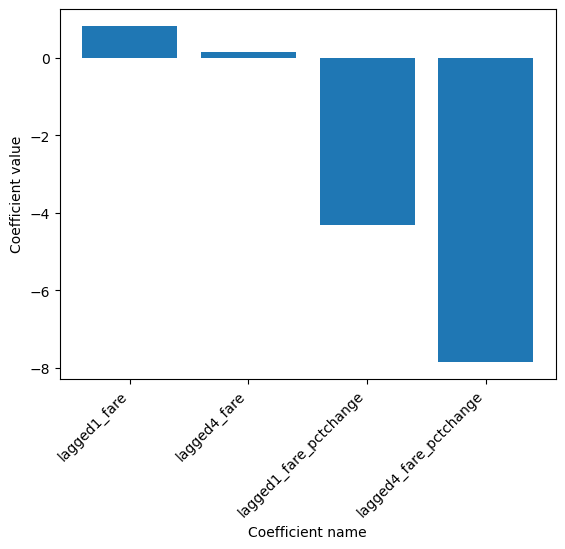

In [44]:
X = df_sample[['lagged1_fare', 'lagged4_fare', 'lagged1_fare_pctchange', 'lagged4_fare_pctchange']]
y = df_sample['fare']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

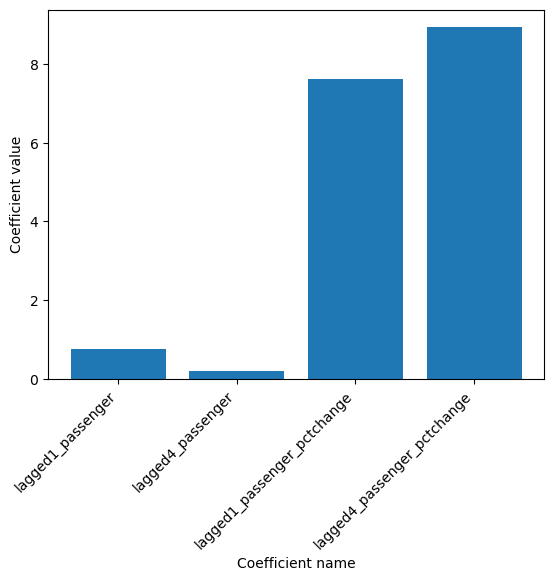

In [7]:
X = df_sample[['lagged1_passenger', 'lagged4_passenger', 'lagged1_passenger_pctchange', 'lagged4_passenger_pctchange']]
y = df_sample['passengers']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

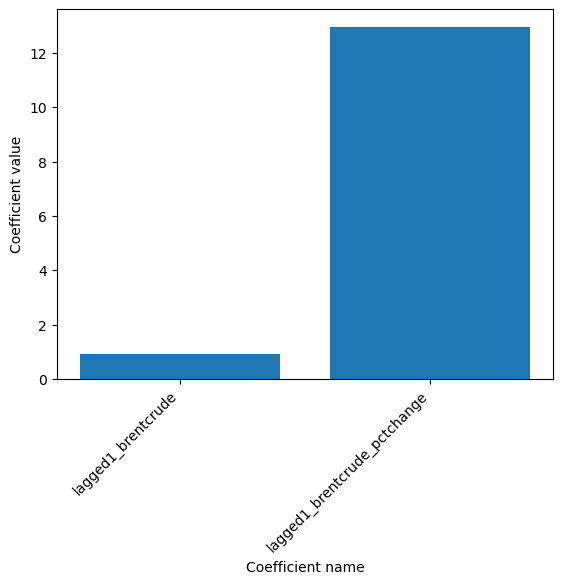

In [8]:
X = df_sample[['lagged1_brentcrude', 'lagged1_brentcrude_pctchange']]
y = df_sample['brentcrude']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

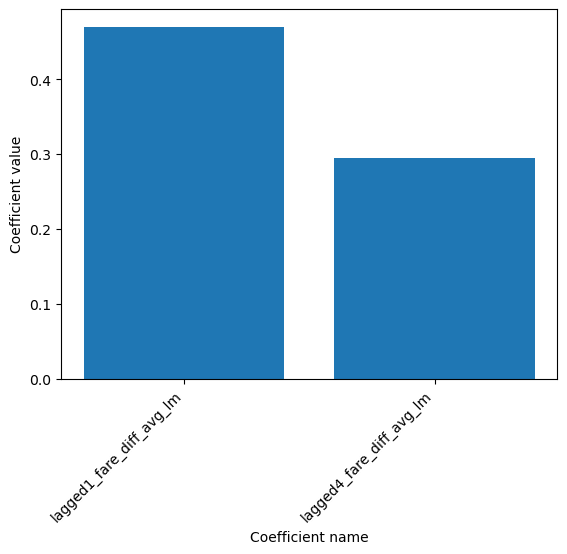

In [9]:
X = df_sample[['lagged1_fare_diff_avg_lm', 'lagged4_fare_diff_avg_lm']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

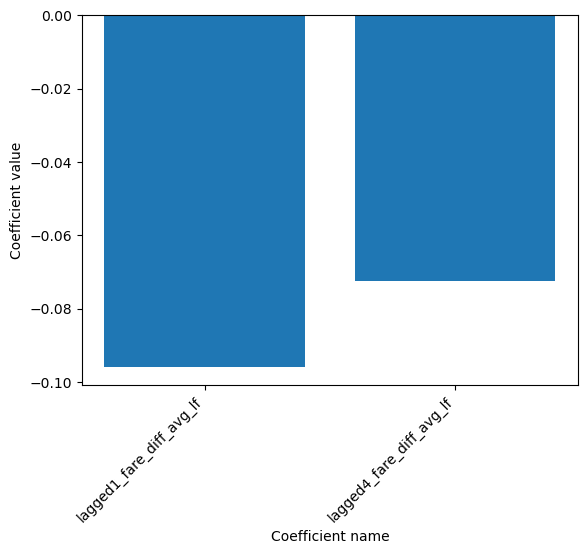

In [10]:
X = df_sample[['lagged1_fare_diff_avg_lf', 'lagged4_fare_diff_avg_lf']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

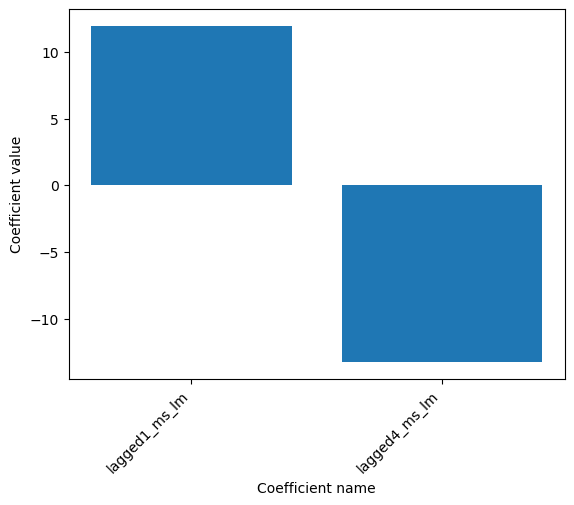

In [11]:
X = df_sample[['lagged1_ms_lm', 'lagged4_ms_lm']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

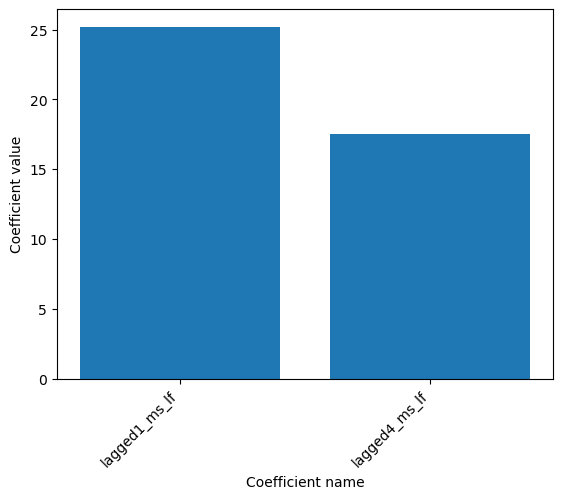

In [12]:
X = df_sample[['lagged1_ms_lf', 'lagged4_ms_lf']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [45]:
df.dropna(inplace=True)
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4,"city_Allentown/Bethlehem/Easton, PA","city_Albuquerque, NM","city_Eureka/Arcata, CA","city_Atlantic City, NJ","city_Colorado Springs, CO","city_Dallas/Fort Worth, TX","city_Pittsburgh, PA","city_Augusta, GA","city_Huntsville, AL","city_Albany, NY","city_Amarillo, TX","city_Denver, CO","city_Aspen, CO","city_Atlanta, GA (Metropolitan Area)","city_Appleton, WI","city_Austin, TX","city_Asheville, NC","city_Tucson, AZ","city_Phoenix, AZ","city_Shreveport, LA","city_Hartford, CT","city_Seattle, WA","city_Bakersfield, CA","city_Mobile, AL","city_Bangor, ME","city_Birmingham, AL","city_El Paso, TX","city_Billings, MT","city_Bismarck/Mandan, ND","city_Cleveland, OH (Metropolitan Area)","city_Bellingham, WA","city_Bloomington/Normal, IL","city_Nashville, TN","city_Boise, ID","city_Boston, MA (Metropolitan Area)","city_Brownsville, TX","city_Baton Rouge, LA","city_Burlington, VT","city_Buffalo, NY","city_Bozeman, MT","city_Washington, DC (Metropolitan Area)","city_Columbia, SC","city_Chicago, IL","city_Chattanooga, TN","city_Charlottesville, VA","city_Charleston, SC","city_Cedar Rapids/Iowa City, IA","city_Charlotte, NC","city_Columbus, OH","city_St. Louis, MO","city_Myrtle Beach, SC","city_Jacksonville, FL","city_Corpus Christi, TX","city_Daytona Beach, FL","city_Dayton, OH","city_Detroit, MI","city_Des Moines, IA","city_Houston, TX","city_Orlando, FL","city_Panama City, FL","city_Valparaiso, FL","city_Elmira/Corning, NY","city_Eugene, OR","city_Key West, FL","city_Fargo, ND","city_Fresno, CA","city_Fayetteville, NC","city_Kalispell, MT","city_Minneapolis/St. Paul, MN","city_New York City, NY (Metropolitan Area)","city_Fort Myers, FL","city_Flint, MI","city_Sioux Falls, SD","city_Fort Wayne, IN","city_Fayetteville, AR","city_Greenville/Spartanburg, SC","city_Spokane, WA","city_Great Falls, MT","city_Grand Junction, CO","city_Gainesville, FL","city_Gulfport/Biloxi, MS","city_Killeen, TX","city_Grand Rapids, MI","city_Greensboro/High Point, NC","city_Harrisburg, PA","city_Harlingen/San Benito, TX","city_Las Vegas, NV","city_Ashland, WV","city_Indianapolis, IN","city_Jackson, WY","city_Jackson/Vicksburg, MS","city_San Francisco, CA (Metropolitan Area)","city_Miami, FL (Metropolitan Area)","city_Los Angeles, CA (Metropolitan Area)","city_Little Rock, AR","city_Lubbock, TX","city_Lexington, KY","city_Lafayette, LA","city_Louisville, KY","city_Cincinnati, OH","city_Midland/Odessa, TX","city_Sacramento, CA","city_Tampa, FL (Metropolitan Area)","city_Kansas City, MO","city_San Antonio, TX","city_Memphis, TN","city_Medford, OR","city_Omaha, NE","city_Milwaukee, WI","city_Quad Cities, IL (Metropolitan Area)","city_Madison, WI","city_Missoula, MT","city_New Orleans, LA","city_San Diego, CA","city_Norfolk, VA (Metropolitan Area)","city_Pensacola, FL","city_Jacksonville/Camp Lejeune, NC","city_Oklahoma City, OK","city_Portland, OR","city_Philadelphia, PA","city_Peoria, IL","city_Paso Robles/San Luis Obispo, CA","city_Pasco/Kennewick/Richland, WA","city_Palm Springs, CA","city_Portland, ME","city_Santa Rosa, CA","city_Rapid City, SD","city_Bend/Redmond, OR","city_Raleigh/Durham, NC","city_Rockford, IL","city_Richmond, VA","city_Reno, NV","city_Roanoke, VA","city_Rochester, NY","city_Salt Lake City, UT","city_Tulsa, OK","city_Savannah, GA","city_Santa Barbara, CA","city_South Bend, IN","city_Sanford, FL","city_Springfield, MO","city_Sarasota/Bradenton, FL","city_Syracuse, NY","city_Tallahassee, FL","city_Bristol/Johnson City/Kingsport, TN","city_Knoxville, TN","city_Durango, CO","city_Scranton/Wilkes-Barre, PA","city_Wichita, KS","city_Evansvil

## FEATURE SELECTION

In [46]:
y = df['fare']
# Set frequency to 4 quarters per year
#y = y.asfreq('Q')

# These are features that MUST be dropped
X = df.drop(['fare', 'brentcrude', 'passengers', 'ms_lm', 'fare_diff_avg_lm', 'ms_lf', 'fare_diff_avg_lf', 
             'Year', 'quarter', 'route_id', 'city1', 'city2', 'fare_proportion_change', 'passenger_proportion_change', 'carrier_lm', 'carrier_lf', 'carrier_lm_category', 'carrier_lf_category'], axis=1)

# Based on the tests above, drop potential irrelevant lagged features (can be adjusted)
X.drop(['lagged1_fare', 'lagged4_fare', 'lagged1_passenger', 'lagged4_passenger', 'lagged1_brentcrude', 'lagged4_fare_diff_avg_lm', 
        'lagged4_fare_diff_avg_lf', 'lagged1_ms_lm', 'lagged4_ms_lf'], axis=1, inplace=True)

X = pd.get_dummies(X, drop_first=True)

# Converting boolean values in X to 0/1 for ARIMA

X.head(5)

,nsmiles,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4,"city_Allentown/Bethlehem/Easton, PA","city_Albuquerque, NM","city_Eureka/Arcata, CA","city_Atlantic City, NJ","city_Colorado Springs, CO","city_Dallas/Fort Worth, TX","city_Pittsburgh, PA","city_Augusta, GA","city_Huntsville, AL","city_Albany, NY","city_Amarillo, TX","city_Denver, CO","city_Aspen, CO","city_Atlanta, GA (Metropolitan Area)","city_Appleton, WI","city_Austin, TX","city_Asheville, NC","city_Tucson, AZ","city_Phoenix, AZ","city_Shreveport, LA","city_Hartford, CT","city_Seattle, WA","city_Bakersfield, CA","city_Mobile, AL","city_Bangor, ME","city_Birmingham, AL","city_El Paso, TX","city_Billings, MT","city_Bismarck/Mandan, ND","city_Cleveland, OH (Metropolitan Area)","city_Bellingham, WA","city_Bloomington/Normal, IL","city_Nashville, TN","city_Boise, ID","city_Boston, MA (Metropolitan Area)","city_Brownsville, TX","city_Baton Rouge, LA","city_Burlington, VT","city_Buffalo, NY","city_Bozeman, MT","city_Washington, DC (Metropolitan Area)","city_Columbia, SC","city_Chicago, IL","city_Chattanooga, TN","city_Charlottesville, VA","city_Charleston, SC","city_Cedar Rapids/Iowa City, IA","city_Charlotte, NC","city_Columbus, OH","city_St. Louis, MO","city_Myrtle Beach, SC","city_Jacksonville, FL","city_Corpus Christi, TX","city_Daytona Beach, FL","city_Dayton, OH","city_Detroit, MI","city_Des Moines, IA","city_Houston, TX","city_Orlando, FL","city_Panama City, FL","city_Valparaiso, FL","city_Elmira/Corning, NY","city_Eugene, OR","city_Key West, FL","city_Fargo, ND","city_Fresno, CA","city_Fayetteville, NC","city_Kalispell, MT","city_Minneapolis/St. Paul, MN","city_New York City, NY (Metropolitan Area)","city_Fort Myers, FL","city_Flint, MI","city_Sioux Falls, SD","city_Fort Wayne, IN","city_Fayetteville, AR","city_Greenville/Spartanburg, SC","city_Spokane, WA","city_Great Falls, MT","city_Grand Junction, CO","city_Gainesville, FL","city_Gulfport/Biloxi, MS","city_Killeen, TX","city_Grand Rapids, MI","city_Greensboro/High Point, NC","city_Harrisburg, PA","city_Harlingen/San Benito, TX","city_Las Vegas, NV","city_Ashland, WV","city_Indianapolis, IN","city_Jackson, WY","city_Jackson/Vicksburg, MS","city_San Francisco, CA (Metropolitan Area)","city_Miami, FL (Metropolitan Area)","city_Los Angeles, CA (Metropolitan Area)","city_Little Rock, AR","city_Lubbock, TX","city_Lexington, KY","city_Lafayette, LA","city_Louisville, KY","city_Cincinnati, OH","city_Midland/Odessa, TX","city_Sacramento, CA","city_Tampa, FL (Metropolitan Area)","city_Kansas City, MO","city_San Antonio, TX","city_Memphis, TN","city_Medford, OR","city_Omaha, NE","city_Milwaukee, WI","city_Quad Cities, IL (Metropolitan Area)","city_Madison, WI","city_Missoula, MT","city_New Orleans, LA","city_San Diego, CA","city_Norfolk, VA (Metropolitan Area)","city_Pensacola, FL","city_Jacksonville/Camp Lejeune, NC","city_Oklahoma City, OK","city_Portland, OR","city_Philadelphia, PA","city_Peoria, IL","city_Paso Robles/San Luis Obispo, CA","city_Pasco/Kennewick/Richland, WA","city_Palm Springs, CA","city_Portland, ME","city_Santa Rosa, CA","city_Rapid City, SD","city_Bend/Redmond, OR","city_Raleigh/Durham, NC","city_Rockford, IL","city_Richmond, VA","city_Reno, NV","city_Roanoke, VA","city_Rochester, NY","city_Salt Lake City, UT","city_Tulsa, OK","city_Savannah, GA","city_Santa Barbara, CA","city_South Bend, IN","city_Sanford, FL","city_Springfield, MO","city_Sarasota/Bradenton, FL","city_Syracuse, NY","city_Tallahassee, FL","city_Bristol/Johnson City/Kingsport, TN","city_Knoxville, TN","city_Durango, CO","city_Scranton/Wilkes-Barre, PA","city_Wichita, KS","city_Evansville, IN","city_Wilmington, NC","city_Mission/McAllen/Edinburg, TX","city_West Palm Beach/Palm Beach, FL","city_Salinas/Monterey, CA","city_Idaho Falls, ID","city_Melbourne, FL","city_Traverse City, MI","city_Stockton, CA","city_Toledo,

### checking colinearity

In [47]:
from statsmodels.tools.tools import add_constant

bool_columns = X.select_dtypes(include='bool').columns
X1 = X.loc[:, ~X.columns.isin(bool_columns)]

X1 = add_constant(X1)
boolean_columns = X1.select_dtypes(include='bool').columns
X1[boolean_columns] = X1[boolean_columns].astype(int)

vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(len(X1.columns)):
    vif_data.loc[vif_data.index[i], "VIF"] = variance_inflation_factor(X1.values, i)

vif_data

,feature,VIF
0,const,25.283771
1,nsmiles,1.254066
2,lagged1_fare_pctchange,1.030149
3,lagged4_fare_pctchange,1.063394
4,lagged1_passenger_pctchange,1.155868
5,lagged4_passenger_pctchange,1.049187
6,lagged1_brentcrude_pctchange,1.208344
7,lagged1_fare_diff_avg_lm,1.174965
8,lagged1_fare_diff_avg_lf,1.287957
9,lagged4_ms_lm,1.352520


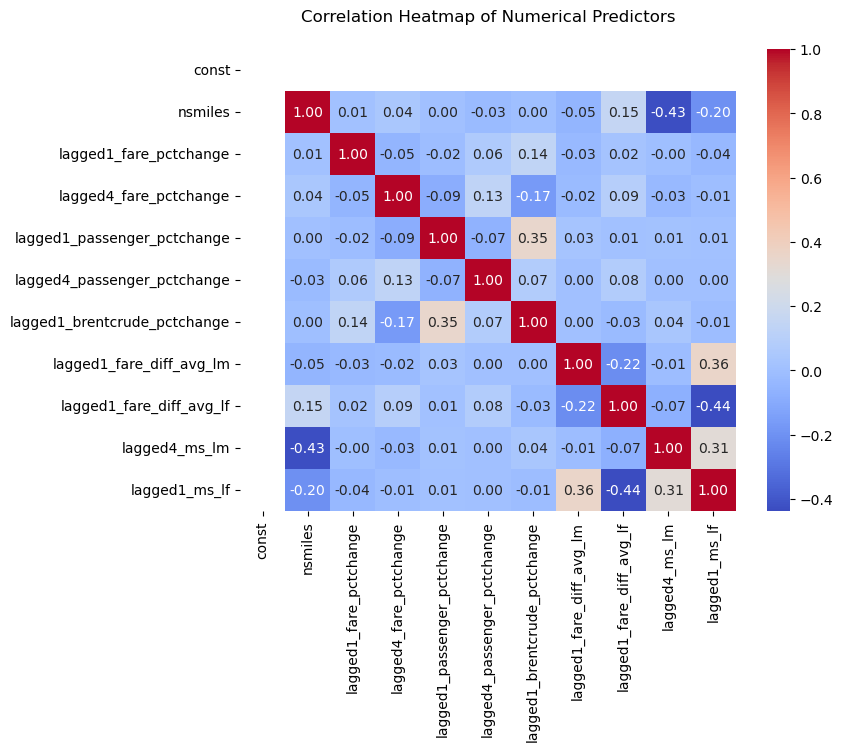

In [48]:
import seaborn as sns

X = X.astype(int)
correlation_matrix = X1.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Predictors', pad=20)
plt.show()

## Model

In [49]:
# Try XGBoost using basic validation set approach
#!pip install xgboost
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7)
model.fit(X_train, y_train)

# Forecast on the test set
forecast = model.predict(X_test)

# Evaluation: Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)

# Output the performance metrics
print(f'XGBoost MSE: {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

XGBoost MSE: 1041.9410483989773
Mean Absolute Error (MAE): 24.869922951682724


In [ ]:
# XGBoost using Time Series Split for 5-Fold Cross-Validation
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Define the TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5) 

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [1000,1500,2000],        # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],      # Step size
    'max_depth': [6, 7, 8, 9, 10],                   # Maximum depth of the tree
    'subsample': [0.7, 0.8, 1.0],             # Proportion of data to use for training
    'colsample_bytree': [0.7, 0.8, 1.0]      # Proportion of features to use for each tree
}

# Initialize the model
model = xgb.XGBRegressor()

# Initialize GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X, y)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Now, predict using the best model
forecast = best_model.predict(X_test)

# Evaluation on the test set
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)

# Output the performance metrics
print(f'XGBoost MSE: {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 2000, 'subsample': 0.7}
XGBoost MSE: 194.06633759555584
Mean Absolute Error (MAE): 10.844607408516447


In [ ]:
# More hyperparameter tuning

# XGBoost using Time Series Split for 5-Fold Cross-Validation
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score

# Define the TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5) 

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [1800, 1900, 2000],        # Number of boosting rounds
    'learning_rate': [0.04, 0.05],      # Step size
    'max_depth': [7, 8],                   # Maximum depth of the tree
    'subsample': [0.7, 0.8],             # Proportion of data to use for training
    'min_child_weight': [5, 6, 7],      # Minimum sum of instance weight needed in a child
    'colsample_bytree': [0.7, 0.8, 1.0]      # Proportion of features to use for each tree
}

# Initialize the model
model = xgb.XGBRegressor()

# Initialize GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X, y)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best model from GridSearchCV
best_params = grid_search.best_estimator_


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.04, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 1800, 'subsample': 0.7}


TypeError: xgboost.sklearn.XGBRegressor() argument after ** must be a mapping, not XGBRegressor

In [ ]:
# MSE calculation for best parameters found from 2nd round of hyperparameter tuning
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score

tscv = TimeSeriesSplit(n_splits=5) 

# Re-initialize the model with the best parameters
best_model = xgb.XGBRegressor(n_estimators=1800, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7)

# Perform cross-validation on the training data
cv_scores = -cross_val_score(best_model, X, y, cv=tscv, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of MSE across folds
mean_cv_mse = np.mean(cv_scores)

# Output the performance metrics
print(f'XGBoost MSE: {mean_cv_mse}')

XGBoost MSE: 1041.5642505022852


In [ ]:
# 3rd round of hyperparameter tuning
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Define the TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5) 

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [2000, 2500, 3000],        # Number of boosting rounds
    'learning_rate': [0.04, 0.05, 0.06, 0.07],      # Step size
    'max_depth': [7, 8, 9],                   # Maximum depth of the tree
    'min_child_weight': [5, 10, 15, 20],      # Minimum sum of instance weight needed in a child
    'subsample': [0.5, 0.6, 0.7],             # Proportion of data to use for training
    'colsample_bytree': [0.5, 0.6, 0.7]      # Proportion of features to use for each tree
}

# Initialize the model
model = xgb.XGBRegressor()

# Initialize GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X, y)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Now, predict using the best model
forecast = best_model.predict(X_test)

# Evaluation on the test set
mse = mean_squared_error(y_test, forecast)

# Output the performance metrics
print(f'XGBoost MSE: {mse}')

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.04, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 2000, 'subsample': 0.5}


NameError: name 'X_test' is not defined

In [24]:
# MSE using best parameters above with validation set 
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.7, min_child_weight=5, subsample=0.5)
model.fit(X_train, y_train)

# Forecast on the test set
forecast = model.predict(X_test)

# Evaluation: Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 818.0909953429282


In [ ]:
# MSE using best parameters from 1st xgboost tuning model with validation set
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.05, max_depth=8, colsample_bytree=0.7, subsample=0.7)
model.fit(X_train, y_train)

# Forecast on the test set
forecast = model.predict(X_test)

# Evaluation: Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast)
print(f'XGBoost MSE: {mse}')

# Higher mse compared to model with 7 tuned hyperparameters

XGBoost MSE: 830.6338141154996


In [53]:
# Cross validation approach for mse calculation of best parameters
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(
    n_estimators=2000,
    learning_rate=0.04,
    max_depth=8,
    min_child_weight=5,
    subsample=0.5,
    colsample_bytree=0.7,
)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 924.7827426955928


In [28]:
# Attempt with regularisation parameter gamma

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, gamma = 0.1)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 818.0909953429282


In [50]:
# Attempt with regularisation parameter alpha for mse comparison & feature importance extraction
from sklearn.metrics import mean_squared_error

# Initialize a DataFrame to store feature importances
all_importances = []

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, reg_lambda = 1)

# Perform TimeSeriesSplit cross-validation
for train_idx, test_idx in tscv.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict and evaluate on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for fold: {mse}")

    # Collect feature importances for this fold
    fold_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    })
    all_importances.append(fold_importances)

# Aggregate feature importances across folds
feature_importance = pd.concat(all_importances).groupby('Feature').mean().sort_values(by='Importance', ascending=False)

print(feature_importance)

MSE for fold: 1811.0295793797736
MSE for fold: 1396.6152232046836
MSE for fold: 1423.5444227247388
MSE for fold: 1501.5259685795907
MSE for fold: 924.7827426955928
                                         Importance
Feature                                            
city_Atlantic City, NJ                     0.056071
haul_category_short                        0.054911
city_Aspen, CO                             0.054618
lagged1_ms_lf                              0.047838
city_Tampa, FL (Metropolitan Area)         0.030854
...                                             ...
city_Rockford, IL                          0.000000
city_Bristol/Johnson City/Kingsport, TN    0.000000
city_Bend/Redmond, OR                      0.000000
year_2011                                  0.000000
lagged1_brentcrude_pctchange               0.000000

[188 rows x 1 columns]


In [51]:
feature_importance[feature_importance['Importance']>0]

,Importance
Feature,
"city_Atlantic City, NJ",0.056071
haul_category_short,0.054911
"city_Aspen, CO",0.054618
lagged1_ms_lf,0.047838
"city_Tampa, FL (Metropolitan Area)",0.030854
...,...
"city_Gainesville, FL",0.000274
lagged1_fare_pctchange,0.000136
"city_Great Falls, MT",0.000136


In [52]:
feature_importance[feature_importance['Importance']>0][:10]

,Importance
Feature,
"city_Atlantic City, NJ",0.056071
haul_category_short,0.054911
"city_Aspen, CO",0.054618
lagged1_ms_lf,0.047838
"city_Tampa, FL (Metropolitan Area)",0.030854
"city_Huntsville, AL",0.027750
"city_Las Vegas, NV",0.027192
"city_Fayetteville, AR",0.027135
"city_Orlando, FL",0.024928


In [35]:
%reset -f

In [54]:
# Attempt with regularisation parameter gamma & feature importance extraction comparison
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the model with hyperparameters
model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, gamma = 0.1)

# List to store MSE for each fold
mse_scores = []

# List to accumulate feature importance across folds
feature_importances_list = []

# Perform cross-validation
for train_idx, test_idx in tscv.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Extract feature importances from the model
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

# Average feature importances across all folds
mean_feature_importance = np.mean(feature_importances_list, axis=0)

# Create a DataFrame to display the average feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Use the correct feature names from your dataset
    'Mean Importance': mean_feature_importance
}).sort_values(by='Mean Importance', ascending=False)

# Output the mean MSE
print(f'Mean MSE across all folds: {mean_mse}')

# Output the feature importances
print("\nAverage Feature Importances:")
print(feature_importance_df)


Mean MSE across all folds: 1411.458201549247

Average Feature Importances:
                                     Feature  Mean Importance
21                    city_Atlantic City, NJ         0.055339
187                      haul_category_short         0.054523
30                            city_Aspen, CO         0.053986
185                            lagged1_ms_lf         0.048846
120       city_Tampa, FL (Metropolitan Area)         0.031095
..                                       ...              ...
1                                  year_2011         0.000000
145                    city_Bend/Redmond, OR         0.000000
176                          city_Toledo, OH         0.000000
147                        city_Rockford, IL         0.000000
162  city_Bristol/Johnson City/Kingsport, TN         0.000000

[188 rows x 2 columns]


In [55]:
feature_importance_df[feature_importance_df['Mean Importance']>0][:10]

,Feature,Mean Importance
21,"city_Atlantic City, NJ",0.055339
187,haul_category_short,0.054523
30,"city_Aspen, CO",0.053986
185,lagged1_ms_lf,0.048846
120,"city_Tampa, FL (Metropolitan Area)",0.031095
26,"city_Huntsville, AL",0.028116
104,"city_Las Vegas, NV",0.027527
92,"city_Fayetteville, AR",0.027305
76,"city_Orlando, FL",0.024897
184,lagged4_ms_lm,0.017349


In [57]:
# Attempt with regularisation parameter gamma & feature importance extraction comparison
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the model with hyperparameters
model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, alpha = 0.1)

# List to store MSE for each fold
mse_scores = []

# List to accumulate feature importance across folds
feature_importances_list = []

# Perform cross-validation
for train_idx, test_idx in tscv.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Extract feature importances from the model
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)

# Calculate the mean MSE across all folds
mean_mse = np.mean(mse_scores)

# Average feature importances across all folds
mean_feature_importance = np.mean(feature_importances_list, axis=0)

# Create a DataFrame to display the average feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Use the correct feature names from your dataset
    'Mean Importance': mean_feature_importance
}).sort_values(by='Mean Importance', ascending=False)

# Output the mean MSE
print(f'Mean MSE across all folds: {mean_mse}')

# Output the feature importances
print("\nAverage Feature Importances:")
print(feature_importance_df)


Mean MSE across all folds: 1415.9573479941423

Average Feature Importances:
                                Feature  Mean Importance
21               city_Atlantic City, NJ         0.060133
187                 haul_category_short         0.056269
30                       city_Aspen, CO         0.054974
185                       lagged1_ms_lf         0.048843
120  city_Tampa, FL (Metropolitan Area)         0.030944
..                                  ...              ...
145               city_Bend/Redmond, OR         0.000000
1                             year_2011         0.000000
181        lagged1_brentcrude_pctchange         0.000000
147                   city_Rockford, IL         0.000000
150                    city_Roanoke, VA         0.000000

[188 rows x 2 columns]


In [59]:
feature_importance_df[feature_importance_df['Mean Importance']>0][:10]

,Feature,Mean Importance
21,"city_Atlantic City, NJ",0.060133
187,haul_category_short,0.056269
30,"city_Aspen, CO",0.054974
185,lagged1_ms_lf,0.048843
120,"city_Tampa, FL (Metropolitan Area)",0.030944
26,"city_Huntsville, AL",0.028192
104,"city_Las Vegas, NV",0.027042
92,"city_Fayetteville, AR",0.027025
76,"city_Orlando, FL",0.024369
184,lagged4_ms_lm,0.017020


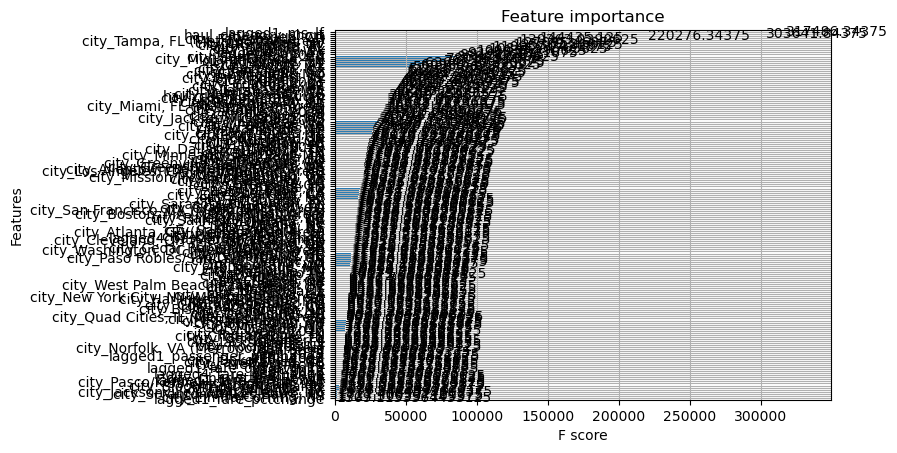

In [ ]:
# Plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plot_importance(model, importance_type='gain')
plt.show()

In [46]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)  # Replace X with your feature matrix

# Plot feature importance based on SHAP values
shap.summary_plot(shap_values, X)


ModuleNotFoundError: No module named 'shap'

In [56]:
# Attempt with regularisation parameter gamma value of 0.5 for mse comparison
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, gamma = 0.5)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 925.6583621430434


In [64]:
# No regularisation parameter
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 932.2207589882266


In [65]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Define custom scoring functions
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Initialize the time series split
tscv = TimeSeriesSplit(n_splits=5)

# Define the model
model = xgb.XGBRegressor(
    n_estimators=2000, 
    learning_rate=0.04, 
    max_depth=8, 
    colsample_bytree=0.8, 
    min_child_weight=5, 
    subsample=0.7
)

# Perform cross-validation for each metric
mse_results = cross_val_score(model, X, y, cv=tscv, scoring=mse_scorer)
mae_results = cross_val_score(model, X, y, cv=tscv, scoring=mae_scorer)
mape_results = cross_val_score(model, X, y, cv=tscv, scoring=mape_scorer)
r2_results = cross_val_score(model, X, y, cv=tscv, scoring=r2_scorer)

# Compute mean metrics across folds
mean_mse = -np.mean(mse_results)
mean_mae = -np.mean(mae_results)
mean_mape = -np.mean(mape_results)
mean_r2 = np.mean(r2_results)

# Output the performance metrics
print(f"XGBoost MSE: {mean_mse}")
print(f"XGBoost MAE: {mean_mae}")
print(f"XGBoost MAPE: {mean_mape}%")
print(f"XGBoost R²: {mean_r2}")

XGBoost MSE: 1411.499587316876
XGBoost MAE: 28.30051454900002
XGBoost MAPE: 12.589501463568993%
XGBoost R²: 0.6739454077546181


In [63]:
# Attempt with regularisation parameter gamma value of 1 for mse comparison
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, gamma = 1)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 932.2207589882266


In [61]:
# Attempt with regularisation parameter lambda
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.04, max_depth=8, colsample_bytree=0.8, min_child_weight=5, subsample=0.7, reg_lambda = 0.1)

# Custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_results = cross_val_score(
    estimator=model,
    X=X, 
    y=y,
    cv=tscv,
    scoring=mse_scorer
)

# Compute the mean and standard deviation of the cross-validated MSE
mean_mse = -np.mean(cv_results)
print(f'XGBoost MSE: {mse}')

XGBoost MSE: 932.2207589882266
